# Project Case Study: Sales Prediction for "AdVance Marketing"

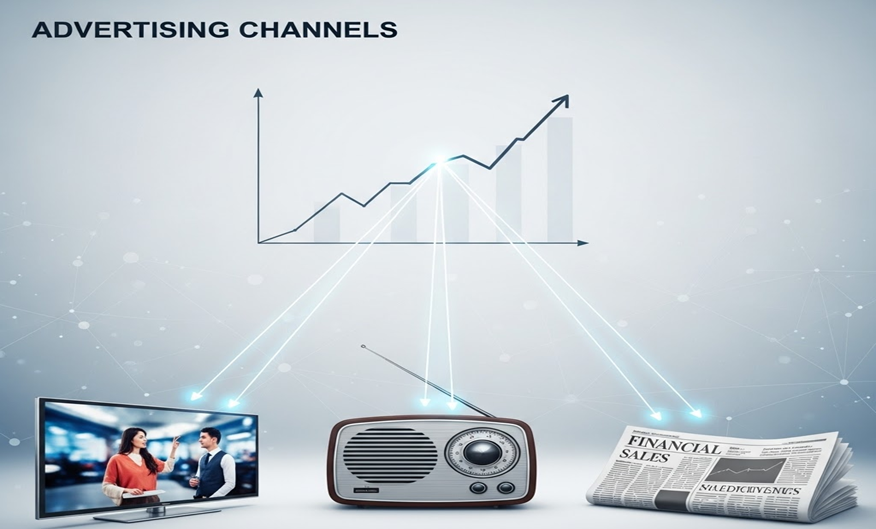



## 1. Business Scenario
**AdVance Marketing**, a leading retail agency, invests significantly in promoting their products across three main media channels: **TV**, **Radio**, and **Newspaper**.

The marketing board is currently deciding on the budget allocation for the next quarter. They have historical data showing how much was spent on each channel and the actual **Sales** figures generated for 200 different markets.

However, they currently lack a reliable method to forecast future sales based on proposed budget changes.

 They want to know: "If we increase TV spend by \$50k and cut Radio by \$10k, what will our Sales look like?"


## 2. The Objective
As a **Data Scientist** hired by AdVance Marketing, your task is to build a predictive model that can estimate the **Sales (units)** based on the advertising budget allocated to TV, Radio, and Newspaper.

You will build a **Linear Regression** model from scratch to understand the fundamental mathematics behind how the model "learns" the relationship between ad spend and sales revenue.

## 3. The Data
You have access to the `Advertising.csv` dataset, which contains 200 records:

* **Features (Independent Variables):**
  * `TV`: Advertising budget spent on TV (in thousands of dollars).
  * `Radio`: Advertising budget spent on Radio (in thousands of dollars).
  * `Newspaper`: Advertising budget spent on Newspaper (in thousands of dollars).

* **Target (Dependent Variable):**
  * `Sales`: Number of units sold (in thousands).

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [27]:

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Linear_Algebra/Maths_Stats_AI/Unit2_calculus/Advertising.csv")



# Display the first 5 rows to check if it loaded correctly
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [28]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Basic stats

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


#### Univariate analysis

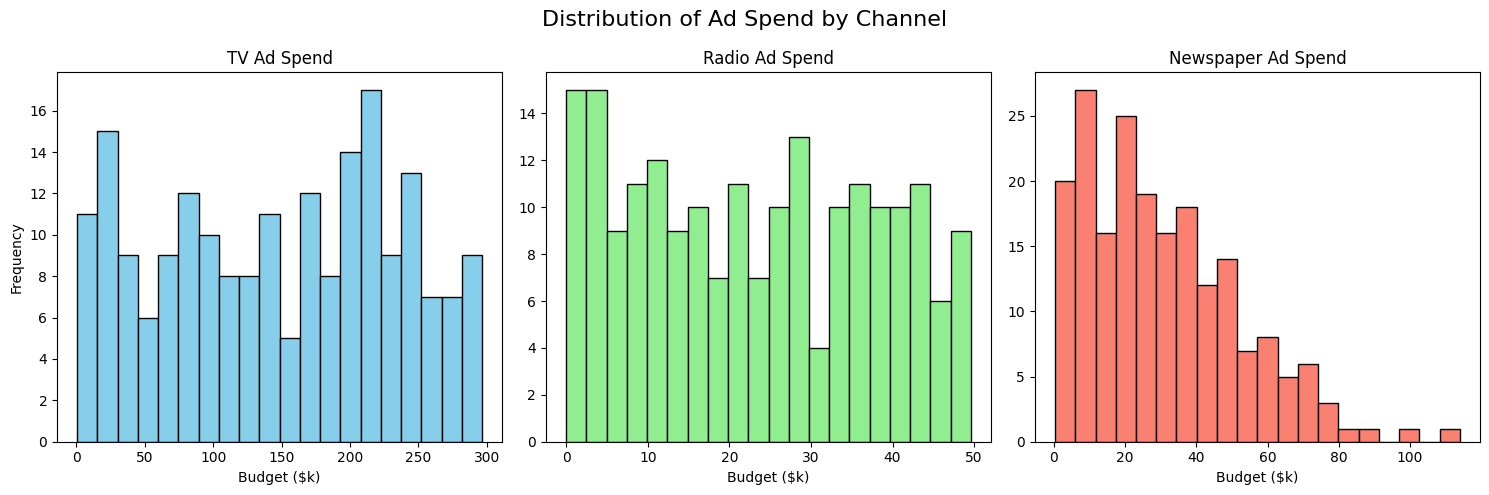

In [31]:
# Set up a figure with 3 subplots (one for each feature)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribution of Ad Spend by Channel', fontsize=16)

# TV Histogram
axes[0].hist(df['TV'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('TV Ad Spend')
axes[0].set_xlabel('Budget ($k)')
axes[0].set_ylabel('Frequency')

# Radio Histogram
axes[1].hist(df['Radio'], bins=20, color='lightgreen', edgecolor='black')
axes[1].set_title('Radio Ad Spend')
axes[1].set_xlabel('Budget ($k)')

# Newspaper Histogram
axes[2].hist(df['Newspaper'], bins=20, color='salmon', edgecolor='black')
axes[2].set_title('Newspaper Ad Spend')
axes[2].set_xlabel('Budget ($k)')

plt.tight_layout()
plt.show()

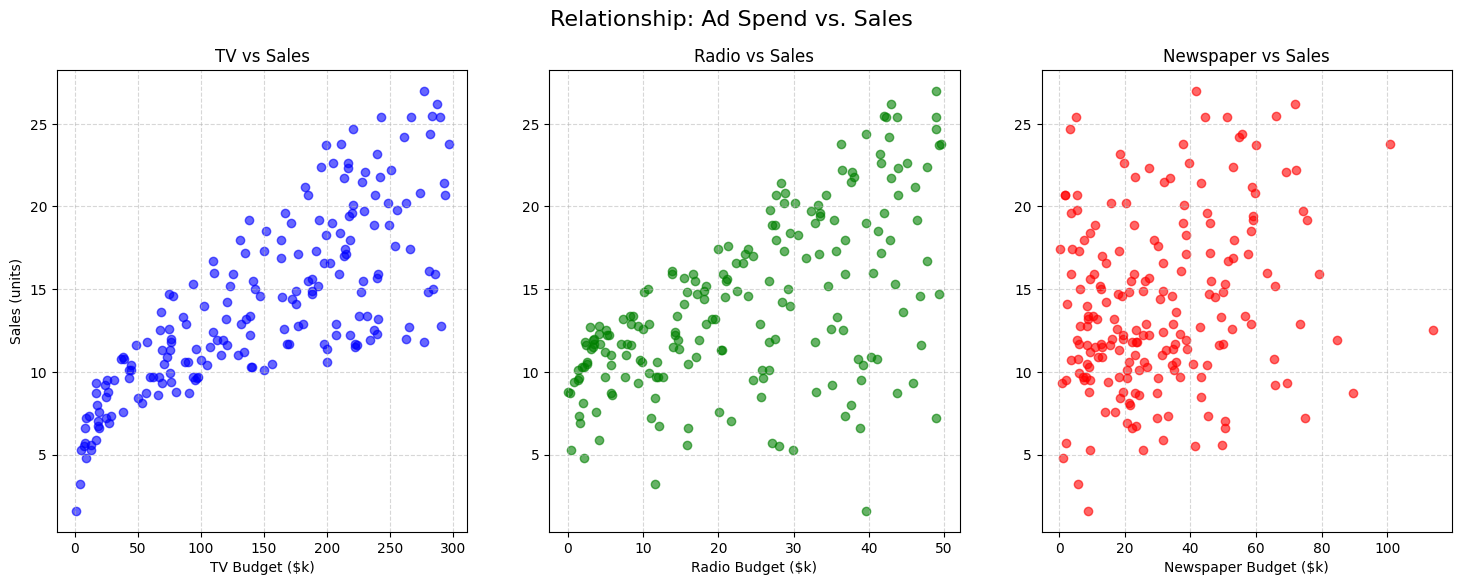

In [32]:
# Create a figure with 3 subplots to compare each channel against Sales
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Relationship: Ad Spend vs. Sales', fontsize=16)

# 1. TV vs Sales
axes[0].scatter(df['TV'], df['Sales'], color='blue', alpha=0.6)
axes[0].set_title('TV vs Sales')
axes[0].set_xlabel('TV Budget ($k)')
axes[0].set_ylabel('Sales (units)')
axes[0].grid(True, linestyle='--', alpha=0.5)

# 2. Radio vs Sales
axes[1].scatter(df['Radio'], df['Sales'], color='green', alpha=0.6)
axes[1].set_title('Radio vs Sales')
axes[1].set_xlabel('Radio Budget ($k)')
axes[1].grid(True, linestyle='--', alpha=0.5)

# 3. Newspaper vs Sales
axes[2].scatter(df['Newspaper'], df['Sales'], color='red', alpha=0.6)
axes[2].set_title('Newspaper vs Sales')
axes[2].set_xlabel('Newspaper Budget ($k)')
axes[2].grid(True, linestyle='--', alpha=0.5)

plt.show()

In [33]:
df.corr().round(1)

,TV,Radio,Newspaper,Sales
TV,1.0,0.1,0.1,0.8
Radio,0.1,1.0,0.4,0.6
Newspaper,0.1,0.4,1.0,0.2
Sales,0.8,0.6,0.2,1.0


In [34]:
# 1. Prepare Data
X = df[['TV', 'Radio', 'Newspaper']].values
y = df['Sales'].values

In [35]:
X

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [36]:


# 2. Feature Scaling (Standardization)
# Formula: z = (x - mean) / std
# We save mean and std to scale new data later for prediction
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

X_scaled = (X - X_mean) / X_std

print("First 5 rows of X_scaled:")
print(X_scaled[:5])

First 5 rows of X_scaled:
[[ 0.96985227  0.98152247  1.77894547]
 [-1.19737623  1.08280781  0.66957876]
 [-1.51615499  1.52846331  1.78354865]
 [ 0.05204968  1.21785493  1.28640506]
 [ 0.3941822  -0.84161366  1.28180188]]


In [37]:
X_scaled

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [38]:
def train_model(X, y, learning_rate=0.01, iterations=1000):
    """
    Trains the Linear Regression model using Gradient Descent.
    Returns: weights, bias, cost_history
    """
    n_samples, n_features = X.shape

    # Initialize parameters (weights) to zeros
    weights = np.zeros(n_features)
    bias = 0
    cost_history = []

    for i in range(iterations):
        # 1. Hypothesis: y_pred = w*x + b
        y_pred = np.dot(X, weights) + bias

        # 2. Calculate Gradients
        # dw = (1/m) * sum((pred - y) * x)
        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
        # db = (1/m) * sum(pred - y)
        db = (1 / n_samples) * np.sum(y_pred - y)

        # 3. Update Parameters (The "Descent")
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # 4. Compute and Record Cost (MSE)
        cost = (1 / (2 * n_samples)) * np.sum((y_pred - y) ** 2)
        cost_history.append(cost)

        # Print cost every 10% of iterations
        if i % (iterations // 10) == 0:
            print(f"Iteration {i}: Cost {cost:.4f}")

    return weights, bias, cost_history



In [39]:
def predict(X, weights, bias):
    """
    Makes predictions using the learned weights and bias.
    """
    return np.dot(X, weights) + bias

In [40]:
# Train the model using the function
# We use a learning rate of 0.1 because the data is scaled
weights, bias, cost_history = train_model(X_scaled, y, learning_rate=0.1, iterations=1000)

print("--- Training Complete ---")
print(f"Learned Weights (Coefficients): {weights}")
print(f"Learned Bias (Intercept): {bias:.4f}")

Iteration 0: Cost 111.8581
Iteration 100: Cost 1.3921
Iteration 200: Cost 1.3921
Iteration 300: Cost 1.3921
Iteration 400: Cost 1.3921
Iteration 500: Cost 1.3921
Iteration 600: Cost 1.3921
Iteration 700: Cost 1.3921
Iteration 800: Cost 1.3921
Iteration 900: Cost 1.3921
--- Training Complete ---
Learned Weights (Coefficients): [ 3.91925365  2.79206274 -0.02253861]
Learned Bias (Intercept): 14.0225


In [41]:
tv_weight = weights[0]
radio_weight = weights[1]
newspaper_weight = weights[2]

print(f"Sales = ({tv_weight:.3f} * TV_scaled) + ({radio_weight:.3f} * Radio_scaled) + ({newspaper_weight:.3f} * Newspaper_scaled) + {bias:.3f}")

Sales = (3.919 * TV_scaled) + (2.792 * Radio_scaled) + (-0.023 * Newspaper_scaled) + 14.022


In [42]:
# Predict sales using the trained model
y_pred = predict(X_scaled, weights, bias)

print("First 5 predicted Sales values:")
print(y_pred[:5])

First 5 predicted Sales values:
[20.52397441 12.33785482 12.30767078 17.59782951 13.18867186]


In [43]:
# Create a DataFrame to compare actual and predicted values
results_df = pd.DataFrame({'Actual Sales': y, 'Predicted Sales': y_pred})

# Display the first 5 rows of the comparison DataFrame
results_df.head()

,Actual Sales,Predicted Sales
0,22.1,20.523974
1,10.4,12.337855
2,9.3,12.307671
3,18.5,17.597830
4,12.9,13.188672


In [44]:
results_df

,Actual Sales,Predicted Sales
0,22.1,20.523974
1,10.4,12.337855
2,9.3,12.307671
3,18.5,17.597830
4,12.9,13.188672
...,...,...
195,7.6,5.370342
196,9.7,8.165312
197,12.8,12.785921
198,25.5,23.767321


In [45]:
# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y)**2))
mae=np.mean(abs(y_pred-y))
# Calculate R-squared
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_pred)**2)
r2 = 1 - (ss_residual / ss_total)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Mean absolute error: {mae: .2f}")

Root Mean Squared Error (RMSE): 1.6686
R-squared (R2): 0.8972
Mean absolute error:  1.25


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Initialize and train Scikit-learn model
skl_model = LinearRegression()
skl_model.fit(X_scaled, y)

# 2. Extract coefficients and intercept
skl_weights = skl_model.coef_
skl_bias = skl_model.intercept_

print("\n--- Scikit-learn Model Results ---")
print(f"Learned Weights (Coefficients): {skl_weights}")
print(f"Learned Bias (Intercept): {skl_bias:.4f}")

# 3. Make predictions
skl_y_pred = skl_model.predict(X_scaled)

# 4. Calculate metrics
skl_rmse = np.sqrt(mean_squared_error(y, skl_y_pred))
skl_mae = mean_absolute_error(y, skl_y_pred)
skl_r2 = r2_score(y, skl_y_pred)

print(f"Root Mean Squared Error (RMSE): {skl_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {skl_mae:.4f}")
print(f"R-squared (R2): {skl_r2:.4f}")

print("\n--- Custom Model Results ---")
print(f"Learned Weights (Coefficients): {weights}")
print(f"Learned Bias (Intercept): {bias:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

print("\n--- Comparison ---")
print("The coefficients and metrics are very similar between our custom model and scikit-learn's Linear Regression, indicating that our gradient descent implementation is working correctly.")


--- Scikit-learn Model Results ---
Learned Weights (Coefficients): [ 3.91925365  2.79206274 -0.02253861]
Learned Bias (Intercept): 14.0225
Root Mean Squared Error (RMSE): 1.6686
Mean Absolute Error (MAE): 1.2520
R-squared (R2): 0.8972

--- Custom Model Results ---
Learned Weights (Coefficients): [ 3.91925365  2.79206274 -0.02253861]
Learned Bias (Intercept): 14.0225
Root Mean Squared Error (RMSE): 1.6686
Mean Absolute Error (MAE): 1.2520
R-squared (R2): 0.8972

--- Comparison ---
The coefficients and metrics are very similar between our custom model and scikit-learn's Linear Regression, indicating that our gradient descent implementation is working correctly.


#### If we increase TV spend by \$50k and cut Radio by $10k, what will our Sales look like?

In [47]:
# Question: Increase TV by $50k, Cut Radio by $10k.

# 1. Define the Baseline (The Average Budget)
# We use X_mean which we calculated in Step 1
baseline_budget = X_mean.copy()

# 2. Define the New Budget (The Scenario)
new_budget = baseline_budget.copy()
new_budget[0] += 50  # Increase TV (Index 0)
new_budget[1] -= 10  # Decrease Radio (Index 1)
# Newspaper (Index 2) stays the same

# 3. Scale the Data (Crucial!)
# Note: baseline_scaled will be all zeros, but let's calculate it explicitly for clarity
baseline_scaled = (baseline_budget - X_mean) / X_std
new_budget_scaled = (new_budget - X_mean) / X_std

# 4. Make Predictions
# We reshape to (1, -1) because our function expects a 2D array (1 row, 3 columns)
base_sales = predict(baseline_scaled.reshape(1, -1), weights, bias)
new_sales = predict(new_budget_scaled.reshape(1, -1), weights, bias)

# 5. Calculate Difference
change = new_sales[0] - base_sales[0]

print(f"Baseline Sales: {base_sales[0]:.2f}k units")
print(f"New Sales:      {new_sales[0]:.2f}k units")
print("-" * 30)
print(f"Impact on Sales: {change:+.2f}k units")

Baseline Sales: 14.02k units
New Sales:      14.43k units
------------------------------
Impact on Sales: +0.40k units
